# Машинное обучение, DS-поток
## Задание ML.2

**Правила:**

* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания получат штраф.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.


**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

* Задача 1 &mdash; 10 баллов;
* Задача 2 &mdash; 20 баллов;
* Задача 3 &mdash; 30 баллов;
* Задача 4 &mdash; 20 баллов;
* Задача 5 &mdash; 150 баллов.

----

b><font size="5">Дорешка:</font></b>

* <b><font size="4">Задача 5</font></b>
  * <b><font color="#f09000" size="3">Добавил ответ на вопрос про большой датасет</font></b>

*Примечание*
* <b><font color="#00b565">#00b565 &mdash; цвет для исправления замечаний</font></b>
* <b><font color="#f09000">#f09000 &mdash; цвет для решений с нуля</font></b>
* проверяющий может иначе классифицировать эти два типа дорешек<

In [1]:
# Bot check

# HW_ID: ds_ml2
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import scipy.special
from time import time

import warnings
warnings.filterwarnings('ignore')
sns.set(palette='Set2')

---
### Задача 1.

Во взвешенном методе наименьших квадратов каждому наблюдению задается некоторый известный вес $w_i$. Задача имеет следующий вид: $$\sum\limits_{i=1}^n w_i(y_i - x_i^T\theta)^2 \rightarrow \min\limits_{\theta \in \mathbb{R}}$$

Найдите решение задачи в матричном виде.

*Решение прикрепил отдельным файлом (ML2.pdf, пункт [1])*

---
### Задача 2.

Рассмотрим модель логистической регрессии. Признаки объекта представимы в виде $d$-мерного вектора $x \in \mathbb{R}^d$, класс имеет бернулиевское распределение $Y \sim Bern(\mu_\theta(x))$. Мы делаем следующее предположение о зависимости параметра вероятности от признаков 
$${\mu_\theta(x) = \sigma(x^T\theta)= \cfrac{1}{1 + e^{-x^T\theta}}}.$$

Зададим регуляризацию через минимизацию следующего функционала:

$${F(\theta) = -\log L_{Y}(\theta) + \lambda \|\theta\|_2^2},$$

где ${L_{Y}(\theta)}$ &mdash; функция правдоподобия.

Опишите процесс оптимизации методами GD, SGD и IRLS.

*Решение прикрепил отдельным файлом (ML2.pdf, пункт [2])*

---
### Задача 3.

Исследуем логистическую регрессию на простых примерах. С помощью кода ниже сгенерируйте данные, состоящие из одного вещественного признака и бинарного таргета.

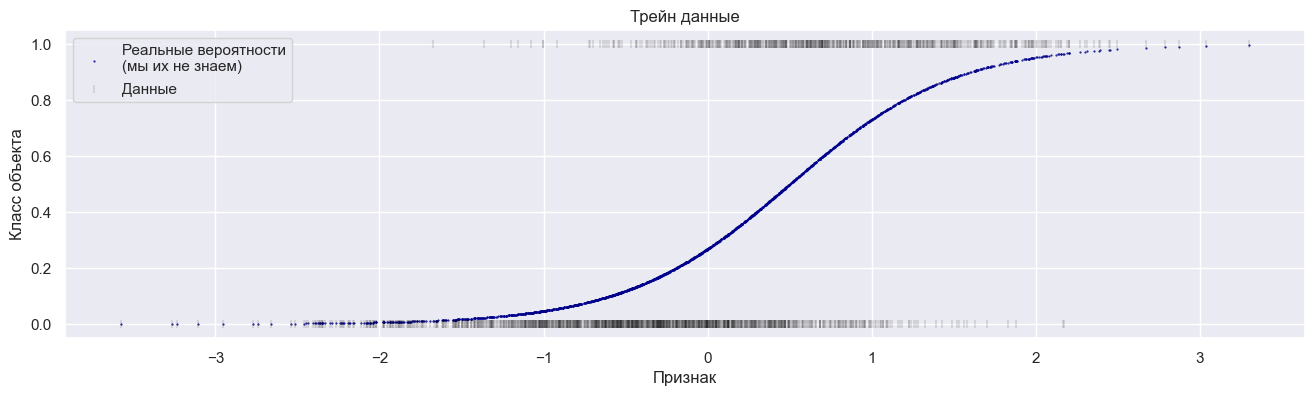

In [3]:
sample_size = 2000
X = np.random.normal(size=(sample_size, 1))  # признаки
y_mean_true = 1 / (1 + np.exp(1 - 2*X.ravel()))  # таргет
y = np.random.binomial(n=1, p=y_mean_true)

plt.figure(figsize=(16,4))
plt.scatter(X, y_mean_true, marker='.', s=1, label='Реальные вероятности\n(мы их не знаем)', color='darkblue')
plt.scatter(X, y, marker='|', alpha=0.1, label='Данные', color='black')
plt.xlabel('Признак')
plt.ylabel('Класс объекта')
plt.title('Трейн данные')
plt.legend();

*Сразу отметим, что распределение смещено вправо, т.е. $F^{-1}(0.5) > 0$. Кроме того, видно, что классы накладываются друг на друга (не разделимы линейно). На практике это означает, что невозможно добиться идеального качества классификации*

*В чате ответили, что разделять X,y на трейн и тест не нужно: весь X попадает в трейн, а в качестве теста будет X_grid*

Обучите логистическую регрессию, используя реализацию из sklearn, при этом
* свободный коэффициент должен присутствовать в модели,
* регуляризацию использовать не нужно.

In [4]:
log_reg = LogisticRegression(fit_intercept=True, penalty=None)
log_reg.fit(X, y)

LogisticRegression(penalty=None)

Напечатайте оценку коэффициентов

In [5]:
print(f'coef_: {log_reg.coef_}, intercept_: {log_reg.intercept_}')

coef_: [[2.18215334]], intercept_: [-1.09016098]


Ниже объявлена сетка значений признака. По этой сетке постройте
* предсказания классов,
* предсказания вероятностей класса 1.

Визуализируйте эти предсказания. На график стоит нанести также обучающую выборку.

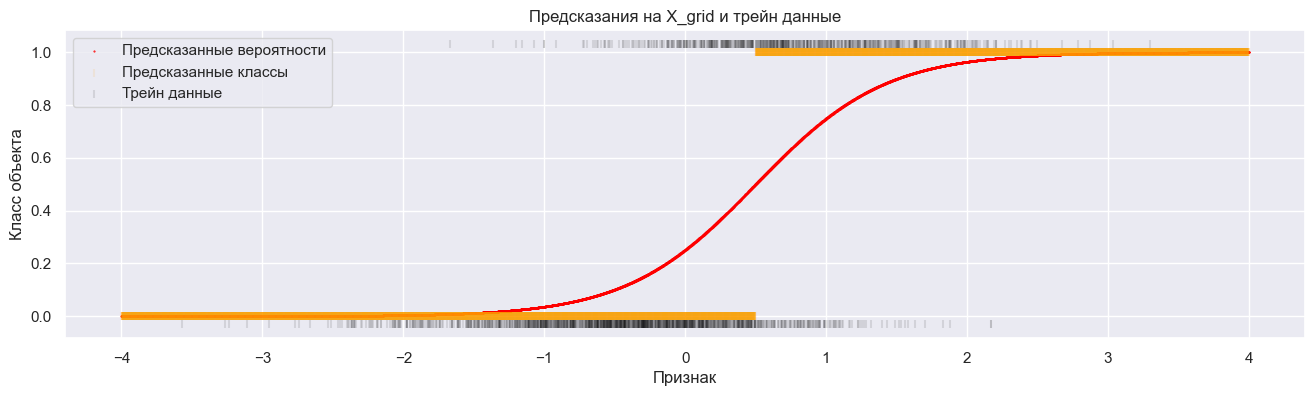

In [6]:
X_grid = np.linspace(-4, 4, 10000).reshape((-1, 1))

pred_proba = log_reg.predict_proba(X_grid)[:,1]
pred_cls = log_reg.predict(X_grid)

plt.figure(figsize=(16,4))
plt.scatter(X_grid, pred_proba, marker='.', s=1, label='Предсказанные вероятности', color='red')
plt.scatter(X_grid, pred_cls, marker='|', alpha=0.1, label='Предсказанные классы', color='orange')
plt.scatter(X, (y-0.5)*1.06+0.5, marker='|', alpha=0.1, label='Трейн данные', color='black')
plt.xlabel('Признак')
plt.ylabel('Класс объекта')
plt.title('Предсказания на X_grid и трейн данные')
plt.legend();

*Предсказанное распределение очень напоминает реальное, и так же смещено вправо. Граница раздела классов проходит в районе X=0.5: именно там оранжевая линия, обозначающая предсказанный класс, претерпевает разрыв. Оранжевые и черные линии не совпадают, что свидетельстует о том, что в реальной задаче с неразделимыми линейно классами классификатор наверняка будет часто ошибаться*

Разбейте отрезок $[-4, 4]$ на одинаковые бины длины порядка 0.2 и посчитайте в каждом бине долю объектов класса 1. Полученные значения добавьте на график предсказаний вероятностей и сравните эти графики. Проинтерпретируйте полученные результаты.

*Подсказка:* может помочь `np.digitize` и метод `groupby` для таблиц `pandas`.

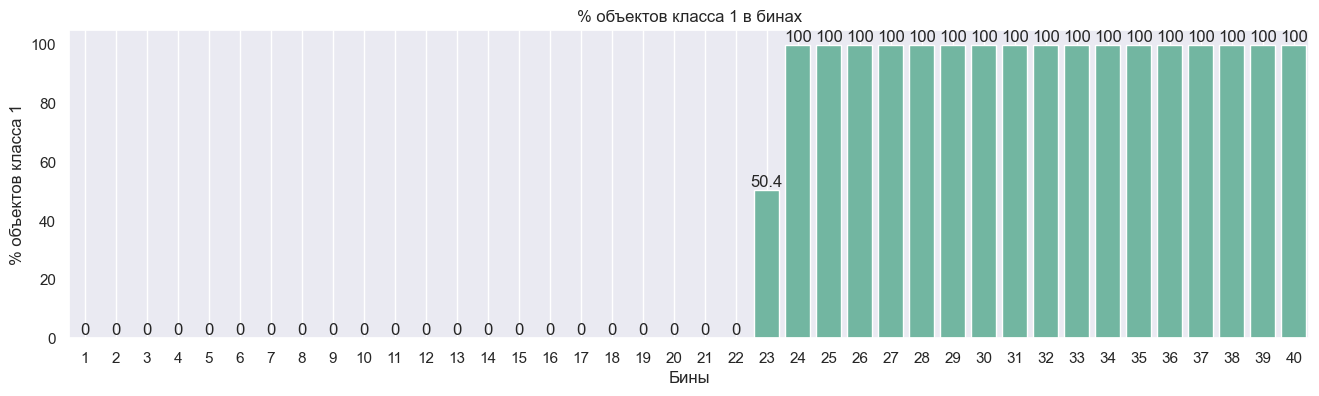

In [7]:
bins = np.arange(-4, 4.2, 0.2)
digitized = np.digitize(X_grid[:,0], bins)
df = pd.DataFrame({'X': X_grid[:,0], 'y': pred_cls*100, 'bin': digitized})  # лайфхак: класс {0,1} умножил на 100, чтобы сразу в усреднении получить проценты
bin_means = df.groupby('bin')['y'].mean().reset_index()
bin_means['bin_centers'] = bin_means['bin'].apply(lambda x: bins[x] + 0.1)

plt.figure(figsize=(16,4))
ax = sns.barplot(x='bin', y='y', data=bin_means, errwidth=0)
ax.bar_label(ax.containers[0])
plt.xlabel('Бины')
plt.ylabel('% объектов класса 1')
plt.title('% объектов класса 1 в бинах')
plt.grid()
plt.show()

*Граница раздела предсказаных классов прошла по 23му бину. Это логично: предсказания логистической регрессии - это числа из диапазона [0,1], которые отсекаются по некоторому порогу, чтобы получить дискретный класс. Поэтому ожидаемо увидеть один бин с некоторой промежуточной долей объектов 1го класса, бины слева от него - с долей 0%, а бины справа - с долей 100%. Тот факт, что граничный бин - под номером 23, дополнительно подтверждает сдвиг распределения вправо*

Повторите проведенное исследование для следующих данных и сравните результаты.

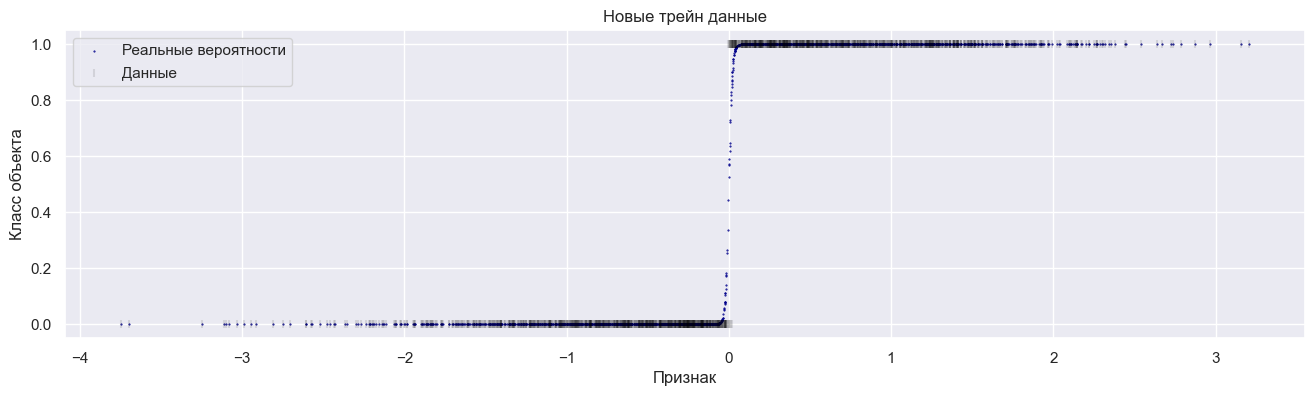

In [8]:
X = np.random.normal(size=(sample_size, 1))  # признаки
y_mean_true = 1 / (1 + np.exp(-100*X.ravel()))  # таргет
y = np.random.binomial(n=1, p=y_mean_true)

plt.figure(figsize=(16,4))
plt.scatter(X, y_mean_true, marker='.', s=1, label='Реальные вероятности', color='darkblue')
plt.scatter(X, y, marker='|', alpha=0.1, label='Данные', color='black')
plt.xlabel('Признак')
plt.ylabel('Класс объекта')
plt.title('Новые трейн данные')
plt.legend();

*В этом случае видно, что данные (практически) линейнно разделимы: линия реальных вероятностей имеет яный скачок в нуле, а точки из трейн данных лежат по разные стороны от нуля (классы почти не пересекаются). Значит, можно добиться высокого качества классификации. Также можно видеть, что распределение не смещено по горизонтали, в отличие от предыдущего случая*

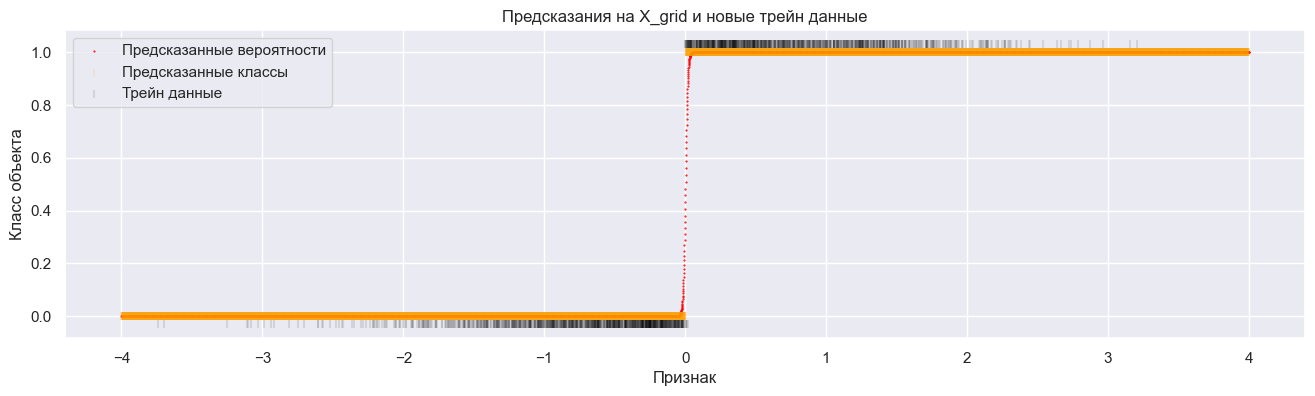

In [9]:
log_reg = LogisticRegression(fit_intercept=True, penalty=None)
log_reg.fit(X, y)

pred_proba = log_reg.predict_proba(X_grid)[:,1]  # предсказания на той же тестовой выборке X_grid
pred_cls = log_reg.predict(X_grid)

plt.figure(figsize=(16,4))
plt.scatter(X_grid, pred_proba, marker='.', s=1, label='Предсказанные вероятности', color='red')
plt.scatter(X_grid, pred_cls, marker='|', alpha=0.1, label='Предсказанные классы', color='orange')
plt.scatter(X, (y-0.5)*1.06+0.5, marker='|', alpha=0.1, label='Трейн данные', color='black')
plt.xlabel('Признак')
plt.ylabel('Класс объекта')
plt.title('Предсказания на X_grid и новые трейн данные')
plt.legend();

*Предсказанное распределение снова очень напоминает реальное. Граница раздела классов проходит в районе X=0, где оранжевая линия, обозначающая предсказанный класс, имеет разрыв, а красная линия, изображающая предсказанные вероятности, имеет резкий скачок. Оранжевые и черные линии практически совпадают: можно предположить, что в реальной задаче с линейно разделимыми классами можно добиться высокого качества классификации*

Исследуйте, как меняются предсказания для второго датасета при наличии регуляризации.

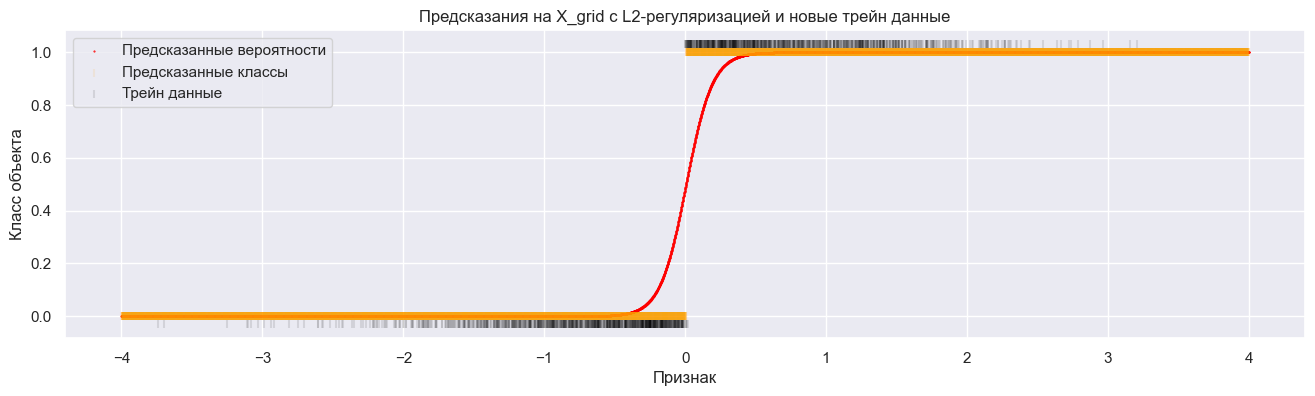

In [10]:
log_reg = LogisticRegression(fit_intercept=True, penalty='l2')  # дефолтный солвер lbfgs поддерживает только L2-регуляризацию, проверим на ней
log_reg.fit(X, y)

pred_proba = log_reg.predict_proba(X_grid)[:,1]
pred_cls = log_reg.predict(X_grid)

plt.figure(figsize=(16,4))
plt.scatter(X_grid, pred_proba, marker='.', s=1, label='Предсказанные вероятности', color='red')
plt.scatter(X_grid, pred_cls, marker='|', alpha=0.1, label='Предсказанные классы', color='orange')
plt.scatter(X, (y-0.5)*1.06+0.5, marker='|', alpha=0.1, label='Трейн данные', color='black')
plt.xlabel('Признак')
plt.ylabel('Класс объекта')
plt.title('Предсказания на X_grid с L2-регуляризацией и новые трейн данные')
plt.legend();

*Поменялся только характер скачка предсказанных вероятностей вблизи нуля (красная линия теперь растет более плавно). Можно сказать, что регуляризация помогла сделать предсказанное распределение более плавным, что сделало модель более устойчивой к флуктуациям классов в области, где признак близок к 0*

**Выводы:**  
*Логистическая регрессия хорошо работает в случае линейно разделимых данных. Выход логистической регрессии удобно интерпретировать как вероятность принадлежности классу, что позволяет проводить "мягкую" классификацию и может пригодиться в ряде практических задач. Регуляризация позволяет сгладить предсказанное распределение и повысить устойчиость модели*

---
### Задача 4.

Сгенерируем данные, состоящие из двух бинарных признаков и бинарного таргета

In [11]:
probs = np.random.uniform(size=8)
probs /= probs.sum()
probs

array([0.17044225, 0.15271895, 0.13039856, 0.1884619 , 0.03413314,
       0.18041043, 0.03220962, 0.11122515])

In [12]:
x = np.random.choice(np.arange(8), p=probs, size=10000)
data = pd.DataFrame(
    np.unpackbits(np.array(x.reshape(-1, 1), dtype='>i8').view(np.uint8), axis=1)[:, -3:],
    columns=['x1', 'x2', 'y'],
)
data.head()

,x1,x2,y
0,1,0,1
1,0,1,0
2,0,0,0
3,0,0,0
4,0,0,1


Особенность таких данных &mdash; конечное число *возможных различных* объектов. В данном случае их всего 4, по количеству всех возможных комбинаций значений признака. Соответственно, любой моделью мы можем сделать только 4 различных предсказания. Исследуем, как с этим справляется логистическая регрессия.

Сначала для сравнения посчитайте долю класса 1 для каждой категории объектов. Подсказка: используйте `pivot_table`.

In [13]:
pivot = data.pivot_table(index=['x1', 'x2'], values='y', aggfunc=lambda x: np.mean(x)).reset_index()
pivot

,x1,x2,y
0,0,0,0.490837
1,0,1,0.583544
2,1,0,0.836735
3,1,1,0.773696


Обучите логистическую регрессию и получите предсказания вероятностей для этих четырех типов объектов. Представьте результаты в таком виде, чтобы их удобно было сравнивать с частотами, посчитанными ранее. 

In [14]:
log_reg = LogisticRegression(fit_intercept=True, penalty=None)
log_reg.fit(data[['x1','x2']], data['y'])
pivot['y_pred'] = log_reg.predict_proba(pivot[['x1','x2']])[:,1]  # вероятность принадлежности классу 1
pivot

,x1,x2,y,y_pred
0,0,0,0.490837,0.514066
1,0,1,0.583544,0.559471
2,1,0,0.836735,0.802239
3,1,1,0.773696,0.829640


Почему результаты не совпадают?

Для ответа на этот вопрос распишите формулу, которая задает модель логистической регрессии, указав все параметры. Какое предположение о данных при этом делает логистическая регрессия?

*В логистической регрессии предсказание считается как $\hat{y}=\sigma(x^T \theta)$, где $\theta$ - параметры, $x$ - признаки (включая 1, если fit_intercept=True), $\sigma$ - сигмоида.*  
*Логистическая регрессия предполагает, что $y \sim Bern(\sigma(x^T \theta))$, что не обязательно правда.*  
*На практике может возникать дисбаланс: объектов разных классов\видов может быть очень разное кол-во, что исказит предсказания модели, придав некоторым видам объектов больший вес. Проверим это, подсчитав объекты всех 4 видов:*  

In [15]:
disbalance = data.pivot_table(index=['x1', 'x2'], values='y', aggfunc='count').reset_index().rename(columns={'y':'count'})
min_cnt = disbalance['count'].min()
disbalance

,x1,x2,count
0,0,0,3274
1,0,1,3160
2,1,0,2205
3,1,1,1361


*Действительно, виден дисбаланс*

Предложите и реализуйте способ обучить логистическую регрессию чтобы она точнее предсказывала частоты, посчитанные ранее.

*Попробуем перед обучением модели сбалансировать данные. Т.е. просемплируем трейн-выборку так, чтобы в модель подавалось одинаковое кол-во объектов всех видов*

In [16]:
data_sampled = pd.concat([data[(data.x1==a) & (data.x2==b)].sample(min_cnt) for a,b in [(0,0),(0,1),(1,0),(1,1)]])  # урезаем все группы объектов по минимальному кол-ву
data_sampled.pivot_table(index=['x1', 'x2'], values='y', aggfunc='count').reset_index().rename(columns={'y':'count'})  # проверяем дисбаланс

,x1,x2,count
0,0,0,1361
1,0,1,1361
2,1,0,1361
3,1,1,1361


In [17]:
log_reg = LogisticRegression(fit_intercept=True, penalty=None)
log_reg.fit(data_sampled[['x1','x2']], data_sampled['y'])

pivot['y_pred'] = log_reg.predict_proba(pivot[['x1','x2']])[:,1]  # вероятность принадлежности классу 1
pivot

,x1,x2,y,y_pred
0,0,0,0.490837,0.511758
1,0,1,0.583544,0.537424
2,1,0,0.836735,0.795374
3,1,1,0.773696,0.811619


*К сожалению, не помогло*

Сделайте вывод по этой и предыдущей задачам.

*Логистическая регрессия плохо справляется с бинарными (возможно, вообще - с дискретными) признаками, а также линейно неразделимыми данными. Кроме того, о распределении данных логистическая регрессия делает ряд предположений, которые могут не соотетствовать действительности. При всех недостатках логистическая регрессия очень простой и удобный вариант для бейзлайн-решения классификационной задачи*

---
### Задача 5.

**1.** Реализуйте логистическую регрессию с регуляризацией для трех вариантов поиска оценки параметров:
* обычный градиентный спуск;
* стохастический mini-batch градиентный спуск с размером батча 5-10;
* IRLS.

Для измерения времени работы **каждого** шага используйте 

`from time import time`

*Замечания.* 

1. Для чистоты эксперимента время шага внутри цикла нужно замерять от конца предыдущего шага до конца текущего, а не от начала текущего шага.
2. Иногда при подсчете сигмоиды и оптимизируемого функционала могут возникать вычислительные ошибки. Для их избежания существуют специальные трюки.
    * [How to Evaluate the Logistic Loss and not NaN trying](http://fa.bianp.net/blog/2019/evaluate_logistic/)
    * [The log-sum-exp trick in Machine Learning](https://www.xarg.org/2016/06/the-log-sum-exp-trick-in-machine-learning/)
    * [Exp-normalize trick](https://timvieira.github.io/blog/post/2014/02/11/exp-normalize-trick/)<br>
3. Трюки не обязательно реализовывать самостоятельно, можете воспользоваться функциями для них из `scipy`, `numpy`: 
    * [`scipy.special.logsumexp`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.logsumexp.html);
    * [`numpy.logaddexp`](https://numpy.org/doc/stable/reference/generated/numpy.logaddexp.html).
4. В методе IRLS можно добавить малый регуляризатор, даже если регуляризации нет, для исключения вычислительных проблем.
5. Следите за качеством кода, комментируйте логические этапы кода. Несоблюдение этого требования может привести к потере баллов.

In [18]:
class LogisticRegression():
    '''
    Модель логистической регрессии. Гиперпараметры:
    :param alpha: параметр регуляризации. Если равно 0 (по умолчанию), то регуляризация не происходит.
    :param lr: константа, на которую домножаем градиент при обучении
    :param eps: ограничение на норму невязки в случае если используется критерий criterion='eps'
    :param max_iter: ограничение на кол-во итераций в случае если используется критерий criterion='max_iter'
    :param method: 'gd' - обычный градиентный спуск, 'sgd' - стохастический градиентный спуск, 'irls' - метод IRLS.
    :param criterion: 'eps' - используем ограничение на норму невязки, 'max_iter' - ограничение на кол-во итераций
    :param fit_intercept: указывает, следует ли добавить константу в признаки
    :param save_history: указывает, следует ли сохранять историю обучения
    '''
    
    def __init__(self, alpha=0, lr=0.01, eps=1e-3, max_iter=5e4, method='gd', criterion='max_iter', fit_intercept=True, save_history=True):
        '''Создает модель и инициализирует параметры.'''
        assert criterion in ['max_iter', 'eps'], 'выбран неправильный критерий остановки'
        assert method in ['gd', 'sgd', 'irls'], 'выбран неправильный метод'
        self.alpha = alpha
        self.lr = lr
        self.eps = eps
        self.max_iter = max_iter
        self.criterion = criterion
        self.method = method
        self.fit_intercept = fit_intercept
        self.save_history = save_history
        self.history_log_likelihood, self.history_time = [], [time()]  # для хранения истории обучения (мне было удобнее сразу разделить на 2 списка)

    @staticmethod
    def _sigmoid(x):
        return 1 / (1 + np.exp(-x))
    
    def _logsig(self, a):  
        """Вычисляет log-sigmoid покомпонентно (из статьи)"""
        out = np.zeros_like(a)
        idx0 = a < -33
        out[idx0] = a[idx0]
        idx1 = (a >= -33) & (a < -18)
        out[idx1] = a[idx1] - np.exp(a[idx1])
        idx2 = (a >= -18) & (a < 37)
        out[idx2] = -np.log1p(np.exp(-a[idx2]))
        idx3 = a >= 37
        out[idx3] = -np.exp(-a[idx3])
        return out

    def _log_likelihood(self, X, y):
        """Численно стабильная имплементация log_likelihood (из статьи)"""
        lin_comb = np.dot(X, self.coef_)
        log_likelihood = np.mean((1 - y) * lin_comb - self._logsig(lin_comb))
        return log_likelihood - self.alpha * np.linalg.norm(self.coef_, ord=2)  # регуляризация (при alpha=0, второе слагаемое занулится)

    def _expit_b(self, a, b):
        """Считает sigmoid(a) - b покомпонентно (из статьи)"""
        idx = a < 0
        out = np.zeros_like(a)
        exp_x = np.exp(a[idx])
        b_idx = b[idx]
        out[idx] = ((1 - b_idx) * exp_x - b_idx) / (1 + exp_x)
        exp_nx = np.exp(-a[~idx])
        b_nidx = b[~idx]
        out[~idx] = ((1 - b_nidx) - b_nidx * exp_nx) / (1 + exp_nx)
        return out

    def _grad(self, X, y):
        """Считает градиент нашего лосса (из статьи)"""
        s = self._expit_b(X.dot(self.coef_), y)
        return X.T.dot(s) / X.shape[0] 
    
    def _add_intercept(self, X):
        '''Добавляем свободный коэффициент к нашей модели (добавим вектор из 1 к исходной матрице).
        :param X: исходная матрица признаков
        :return: матрица X с добавленным свободным коэффициентов
        '''
        X_copy = np.full((X.shape[0], X.shape[1] + 1), fill_value=1)
        X_copy[:, :-1] = X
        return X_copy

    def fit(self, X, Y):
        '''Обучает модель лог. рег. (выбранным методом), пока не выполнится критерий остановки self.criterion.
        При self.save_history=True, добавляет в self.history текущее значение оптимизируемого функционала и время обновления коэф-тов 
        :param X: матрица признаков
        :param Y: истинные метки
        '''
        assert X.shape[0] == Y.shape[0], (X.shape,Y.shape)
        X_copy = self._add_intercept(X) if self.fit_intercept else X.copy()  # добавляем свободный коэф-т
        self.coef_ = np.zeros(X_copy.shape[1])  # коэффициенты модели

        for i in range(int(self.max_iter)):
            self.prev_coef_ = self.coef_.copy()  # сохраняем старые веса (до обновления)

            if self.method == 'gd':  # обычный градиентный спуск
                grad = self._grad(X_copy, Y)
                grad += (self.alpha * self.coef_) / Y.size  # регуляризация (при alpha=0, слагаемое занулится)
                self.coef_ -= self.lr * grad
            
            elif self.method == 'sgd':  # стохастический (мини-батч) градиентный спуск
                for j in range(0, X_copy.shape[0], 5):  # размер батча 5
                    end = j + 5 if j + 5 < X_copy.shape[0] else X_copy.shape[0]
                    X_batch, Y_batch = X_copy[j:end], Y[j:end]
                    grad = self._grad(X_batch, Y_batch)
                    grad += (self.alpha * self.coef_) / Y_batch.size  # регуляризация (при alpha=0, слагаемое занулится)
                    self.coef_ -= self.lr * grad
            
            elif self.method == 'irls':  # метод IRLS
                pred = self._sigmoid(np.dot(X_copy, self.coef_))
                W = np.diag(pred * (1 - pred))  # матрица весов
                H = np.dot(X_copy.T, np.dot(W, X_copy))  # гессиан
                H += (self.alpha + 0.01) * np.eye(X_copy.shape[1])  # регуляризация (при alpha=0, слагаемое почти занулится, но не совсем, чтобы избежать вырождения)
                grad = np.dot(X_copy.T, (Y - pred))
                self.coef_ += np.linalg.solve(H, grad)

            if self.save_history:  # сохраняем логи
                log_likelihood = -self._log_likelihood(X_copy, Y)
                self.history_log_likelihood.append(log_likelihood)
                self.history_time.append(time())

            if self.criterion=='max_iter' and i == self.max_iter - 1:  # проверяем условия остановки
                break   
            elif self.criterion=='eps' and np.linalg.norm(self.coef_ - self.prev_coef_, ord=2) < self.eps:
                break

        self.intercept_ = self.coef_[0] if self.fit_intercept else 0  # свободный коэффициент
        self.n_iter_ = i + 1  # число прошедших итераций
        return self
    
    def get_time_deltas(self):
        '''Возрщает дельты по времени, т.е. массив времен выполнения всех итераций'''
        return np.diff(np.array(self.history_time))

    def predict(self, X):
        '''Применяет обученную модель к данным и возвращает точечное предсказание (оценку класса).
        :param X: матрица признаков
        :return: предсказание с размерностью (n_test, )
        '''
        X_copy = self._add_intercept(X) if self.fit_intercept else X.copy()
        assert X_copy.shape[1] == self.coef_.shape[0]
        return np.round(self._sigmoid(np.dot(X_copy, self.coef_)))
 
    def predict_proba(self, X):
        '''Применяет обученную модель к данным и возвращает предсказание вероятности классов 0 и 1.
        :param X: матрица признаков
        :return: вероятности предсказания с размерностью (n_test, 2)
        '''
        X_copy = self._add_intercept(X) if self.fit_intercept else X.copy()
        assert X_copy.shape[1] == self.coef_.shape[0]
        proba_pred = self._sigmoid(np.dot(X_copy, self.coef_))
        return np.column_stack((1 - proba_pred, proba_pred))

Рассмотрим игрушечный датасет на $30$ признаков `load_breast_cancer` из библиотеки `sklearn`. Это относительно простой для бинарной классификации датасет по диагностике рака молочной железы.

Ради интереса можно прочитать описание признаков.

In [19]:
dataset = load_breast_cancer()
dataset['DESCR'].split('\n')[11:31]

[':Attribute Information:',
 '    - radius (mean of distances from center to points on the perimeter)',
 '    - texture (standard deviation of gray-scale values)',
 '    - perimeter',
 '    - area',
 '    - smoothness (local variation in radius lengths)',
 '    - compactness (perimeter^2 / area - 1.0)',
 '    - concavity (severity of concave portions of the contour)',
 '    - concave points (number of concave portions of the contour)',
 '    - symmetry',
 '    - fractal dimension ("coastline approximation" - 1)',
 '',
 '    The mean, standard error, and "worst" or largest (mean of the three',
 '    worst/largest values) of these features were computed for each image,',
 '    resulting in 30 features.  For instance, field 0 is Mean Radius, field',
 '    10 is Radius SE, field 20 is Worst Radius.',
 '',
 '    - class:',
 '            - WDBC-Malignant',
 '            - WDBC-Benign']

Разделим нашу выборку на обучающую и тестовую:

In [20]:
X, y = dataset['data'], dataset['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

При использовании регуляризации данные необходимо нормализовать. Воспользуемся для этого классом `StandardScaler` из библиотеки `sklearn`. 

In [21]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train, X_test = scaler.transform(X_train), scaler.transform(X_test)

**2.** Теперь обучите три модели логистической регрессии без регуляризации с помощью методов
* обычный градиентный спуск;
* стохастический mini-batch градиентный спуск;
* IRLS.

Постройте график, на котором нанесите три кривые обучения, каждая из которых отображает зависимость оптимизируемого функционала от номера итерации метода. **Функционал должен быть одинаковый для всех моделей: логарифм функции правдоподобия без минусов**. Нарисуйте также график зависимости этого функционала от времени работы метода. Сделайте выводы. Что будет при обучении на датасете, в котором больше строк, а число столбцов останется прежним?

*Замечания:* 
* Все графики должны быть информативны, с подписанными осями и т.д..
* Для чистоты эксперимента желательно не запускать в момент обучения другие задачи и провести обучение несколько раз, усреднив результаты.

In [22]:
history_log_likelihood, history_time = {}, {}
num_runs = 25

for method in ['gd','sgd','irls']:
    for i in range(num_runs):  # обучим все модели по многу раз, 
        model = LogisticRegression(method=method)
        model.fit(X_train, y_train)
        if i == 0:
            history_log_likelihood[method] = model.history_log_likelihood  # логи функционала сохраним с первого запуска,
            history_time[method] = model.get_time_deltas()
        else:
            history_time[method] += model.get_time_deltas()  # а время работы усредним по всем запускам
    history_time[method] /= num_runs

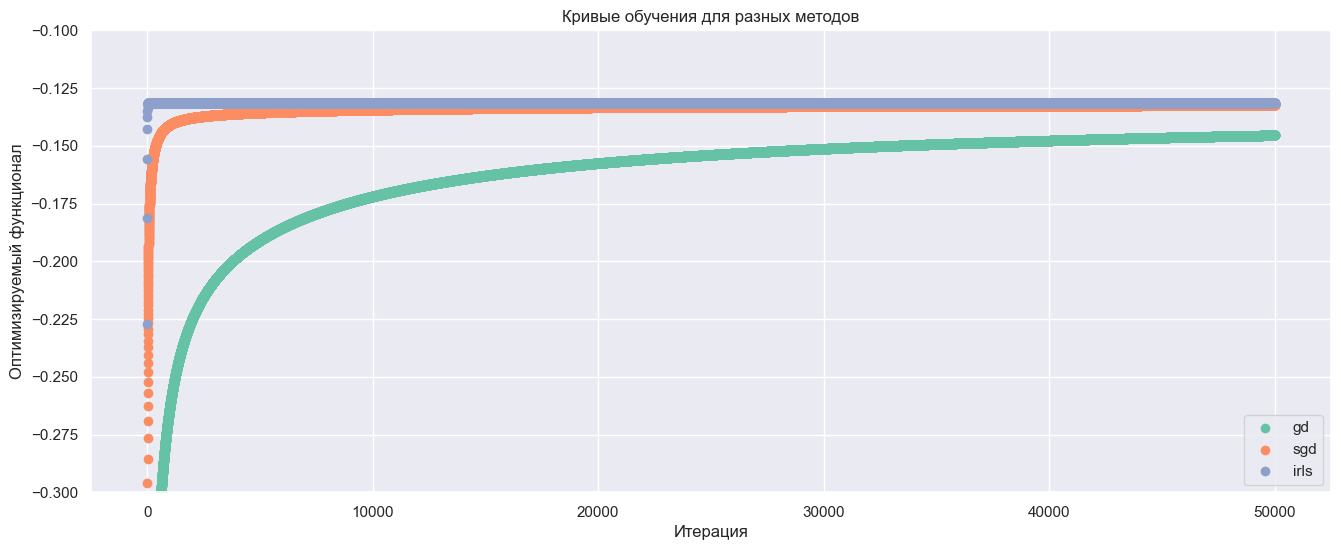

In [23]:
plt.figure(figsize=(16,6))
for method, log_likelihood in history_log_likelihood.items():
    plt.scatter(range(1,len(log_likelihood)+1), log_likelihood, label=method) 
plt.xlabel('Итерация')
plt.ylabel('Оптимизируемый функционал')
plt.title('Кривые обучения для разных методов')
plt.ylim((-0.3,-0.1))
plt.legend();

*По графику видно, что лучше всего сошелся метод IRLS, на втором месте - SGD, на третьем - GD. Однако, отличие совсем невелико и можно сказать, что все подходы показали сопоставимое качество. Видимо, при выборе метода обучения следует выбирать тот, который работает быстрее*

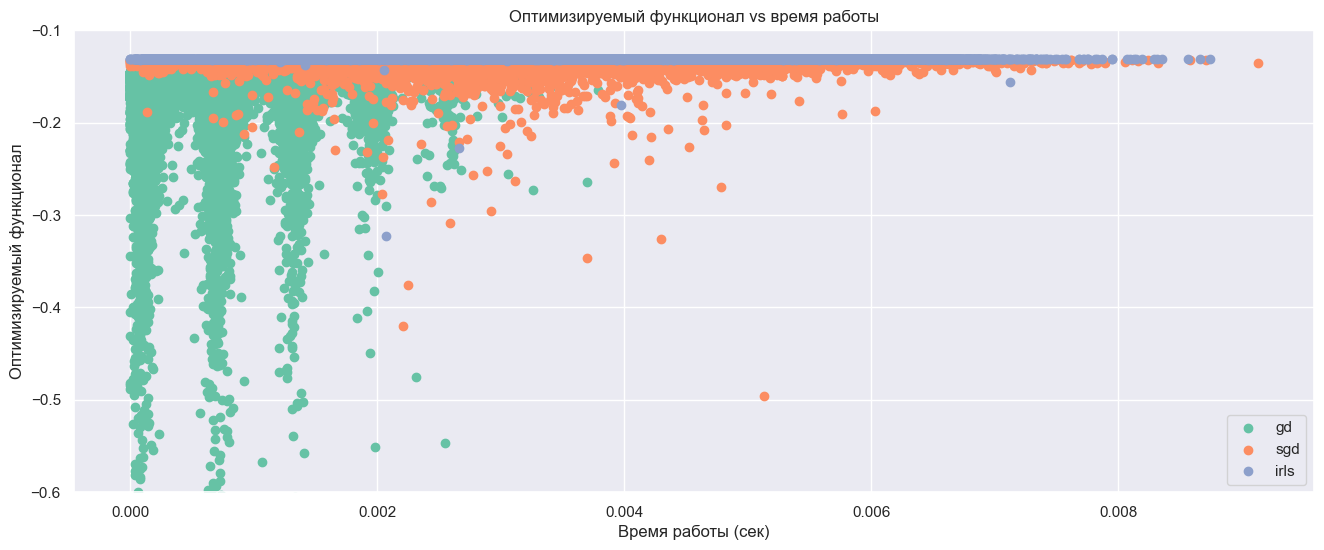

In [24]:
plt.figure(figsize=(16,6))
for method in history_log_likelihood.keys():
    plt.scatter(history_time[method], history_log_likelihood[method], label=method) 
plt.xlabel('Время работы (сек)')
plt.ylabel('Оптимизируемый функционал')
plt.title('Оптимизируемый функционал vs время работы')
plt.ylim((-0.6,-0.1))
plt.legend();

*По графику видно, что время выполнения шага сильно флуктуирует, но в целом, с ростом времени растет и качество*

**3.** Сравните два реализованных критерия остановки по количеству проведенных итераций: 
* евклидова норма разности текущего и нового векторов весов стала меньше, чем $10^{-4}$;
* ограничение на число итераций (например, $10000$). 

Используйте градиентный спуск.

In [25]:
for kwargs in [{'criterion':'eps', 'eps':0.0001, 'max_iter':1e9}, {'criterion':'max_iter', 'max_iter':10000}]:  # при eps надо большой max_iter, чтобы останавливалось именно по eps
    model = LogisticRegression(method='gd', save_history=False, **kwargs)
    model.fit(X_train, y_train)
    print(f'{kwargs["criterion"]}: {model.n_iter_} итераций')

eps: 18237 итераций
max_iter: 10000 итераций


*С использованием критерия остановки eps (стационарность весов) прошло порядка 18к итераций. С использованием критерия остановки max_iter (фиксированное число эпох) прошло 10к итераций (сколько и указали). Оба критерия останоки имеют плюсы и минусы:*  
 - *Критерий eps позоляет остановить обучение в момент выхода на плато, т.е. когда веса перестают обновляться. В этом случае причина остановки обучения легко интерпретируется ("модель перестала учиться, т.к. выучила все доступные для нее закономерности"), но есть риск переобучения*  
 - *Критерий max_iter позоляет вовремя остановить обучение, а значит, если хорошо подобрать число итераций, можно избежать переобучения. Сложность как раз в том, что оптимальное значение max_iter тяжело подобрать, плюс оно может меняться при варьировании других параметро обучения*

**4.** Рассмотрите как влияет размер шага (`learning rate`) на качество модели. Обучите каждую модель одинаковое число итераций (например, 10000), а затем посчитайте качество. Воспользуйтесь ограничением на число итераций в качестве критерия остановки, так как для больших `learning rate` у вас может не сойтись модель. Используйте стохастический градиентный спуск. Сделайте выводы.

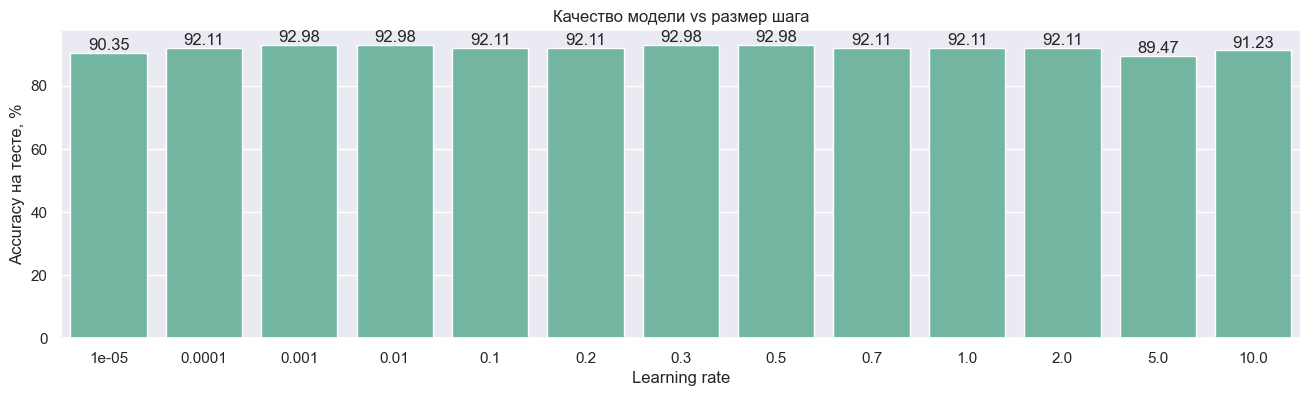

In [26]:
lrs = [1e-5, 1e-4, 1e-3, 1e-2, 0.1, 0.2, 0.3, 0.5, 0.7, 1, 2, 5, 10]
accs = []

for lr in lrs:
    model = LogisticRegression(method='sgd', save_history=False, criterion='max_iter', max_iter=10000, lr=lr)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)  # предсказание на тесте
    accs.append(round(accuracy_score(y_test, y_pred) * 100, 2))  # логгируем акьюраси (в процентах)

plt.figure(figsize=(16,4))
ax = sns.barplot(x=lrs, y=accs, errwidth=0)
ax.bar_label(ax.containers[0])
plt.xlabel('Learning rate')
plt.ylabel('Accuracy на тесте, %')
plt.title('Качество модели vs размер шага');

*Видно, что оптимальное значение learning_rate лежит в диапазоне $[0.001, 0.5]$. При слишком больших значениях lr модель "перепрыгивает" оптимум функционала ошибки и в итоге не попадает в него. При слишком маленьких значениях lr модель не успевает подойти к оптимуму достаточно близко. Стоит отметить, что различия по качеству составляют <3% (что тем не менее может сыграть решающую роль на практике)*

Постройте кривые обучения для различных `learning rate`. Не обязательно рассматривать все `learning rate`, так как их слишком много, и график будет нагроможден. Возьмите около половины из них. Какой `learning rate` лучше выбрать? Чем плохи маленькие и большие `learning rate`?

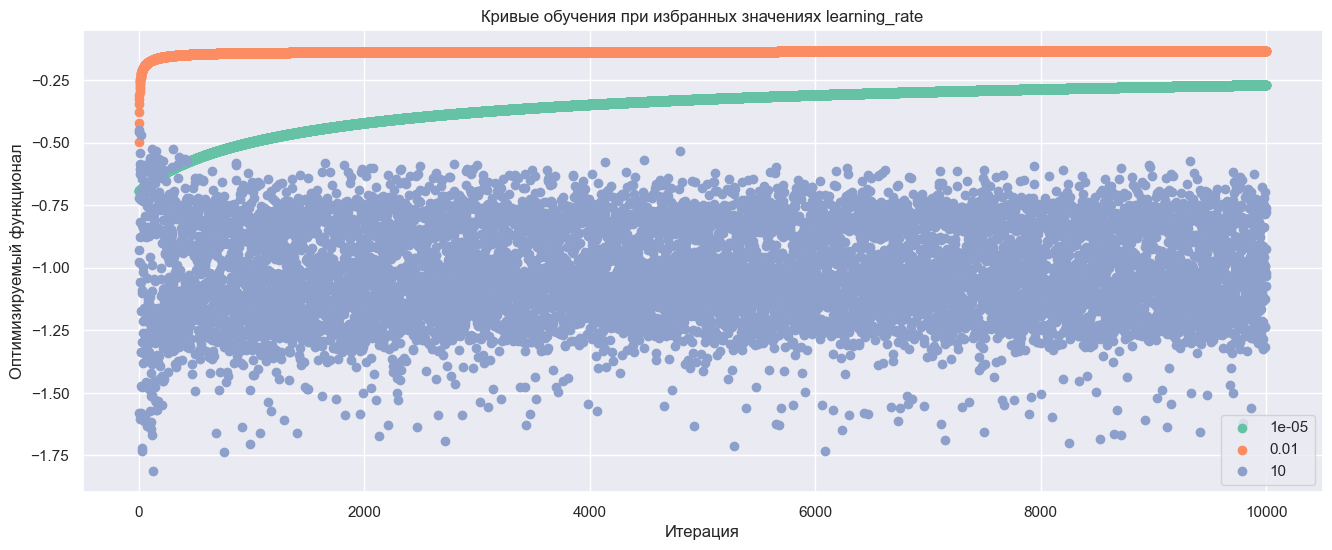

In [27]:
lrs = [1e-5, 1e-2, 10]  # проредим исходный набор lrs 
history_log_likelihood = []

for lr in lrs:
    model = LogisticRegression(method='sgd', criterion='max_iter', max_iter=10000, lr=lr)
    model.fit(X_train, y_train)
    history_log_likelihood.append(model.history_log_likelihood)

plt.figure(figsize=(16,6))
for lr, log_likelihood in zip(lrs, history_log_likelihood):
    plt.scatter(range(1,len(log_likelihood)+1), log_likelihood, label=lr) 
plt.xlabel('Итерация')
plt.ylabel('Оптимизируемый функционал')
plt.title('Кривые обучения при избранных значениях learning_rate')
plt.legend();

*Подтвердились выводы из предыдущей ячейки. При lr=10 (слишком большом) модель не попадает в оптимум функционала ошибки, а перепрыгивания вокруг него отражены на графике как большой разброс по вертикали. При lr=1e-5 модель обучается крайне медленно, так и не доходя до оптимума, из-за чего кривая обучения пологая и лежит ниже оптимальной. Наконец, при lr=0.01 модель обучается лучше всего (хотя, конечно, стоит отдельно проверить ее на переобучение, сравнив качество на трейне и тесте)*

**5.** Рассмотрите несколько моделей, полученные при помощи GD, в которых установите не менее 5-ти различных коэффициентов регуляризации, а также модель без регуляризатора. Сравните, влияет ли наличие регуляризации на скорость сходимости и качество, сделайте выводы. Под качеством подразумевается значение какой-либо выбранной вами метрики качества классификации.

In [28]:
alphas = [0, 0.01, 0.1, 1, 10, 100, 500]  # 7 значений, включая нулевое
accs, times = [], []

for a in alphas:
    start = time()
    for i in range(num_runs):  # посчитаем суммарное время и усредним
        model = LogisticRegression(method='gd', save_history=False, alpha=a)
        model.fit(X_train, y_train)
    end = time()
    times.append((end - start) / num_runs)
    y_pred = model.predict(X_test)  # получим предсказание на тесте от последней обученной модели
    accs.append(round(accuracy_score(y_test, y_pred) * 100, 2))  # логгируем акьюраси (в процентах)

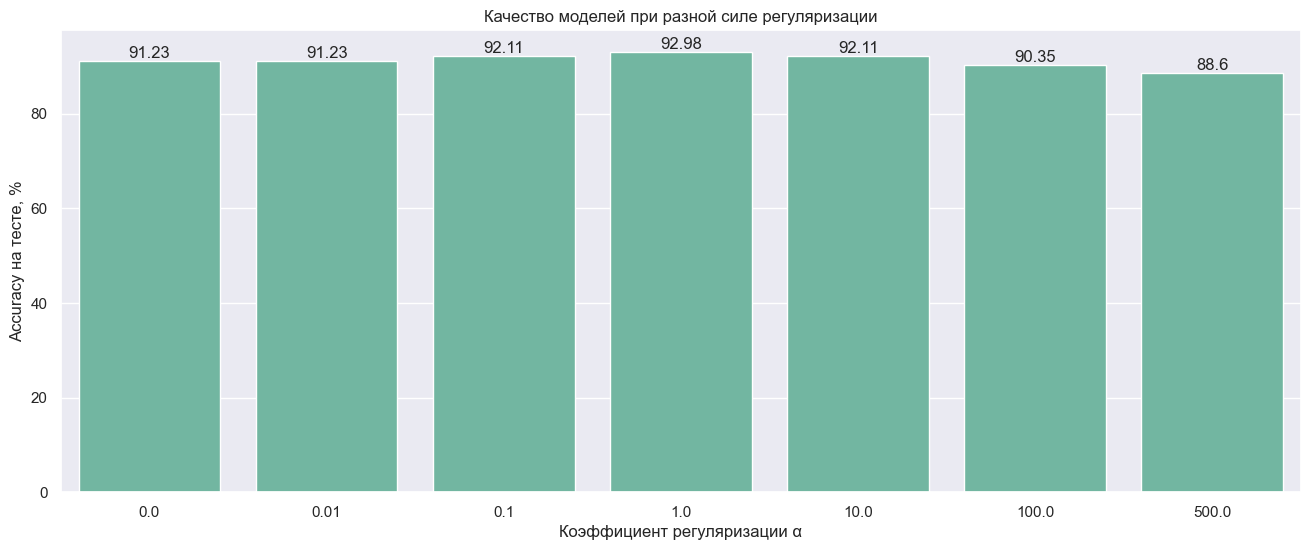

In [29]:
plt.figure(figsize=(16,6))
ax = sns.barplot(x=alphas, y=accs, errwidth=0)
ax.bar_label(ax.containers[0])
plt.xlabel('Коэффициент регуляризации α')
plt.ylabel('Accuracy на тесте, %')
plt.title('Качество моделей при разной силе регуляризации');

*Видно, что оптимальная сила регуляризации $\alpha$ находится около 1. Заметнее всего эффект провляется в правой части графика, где регуляризация слишком сильная и качество падает на несколько процентных пунктов*

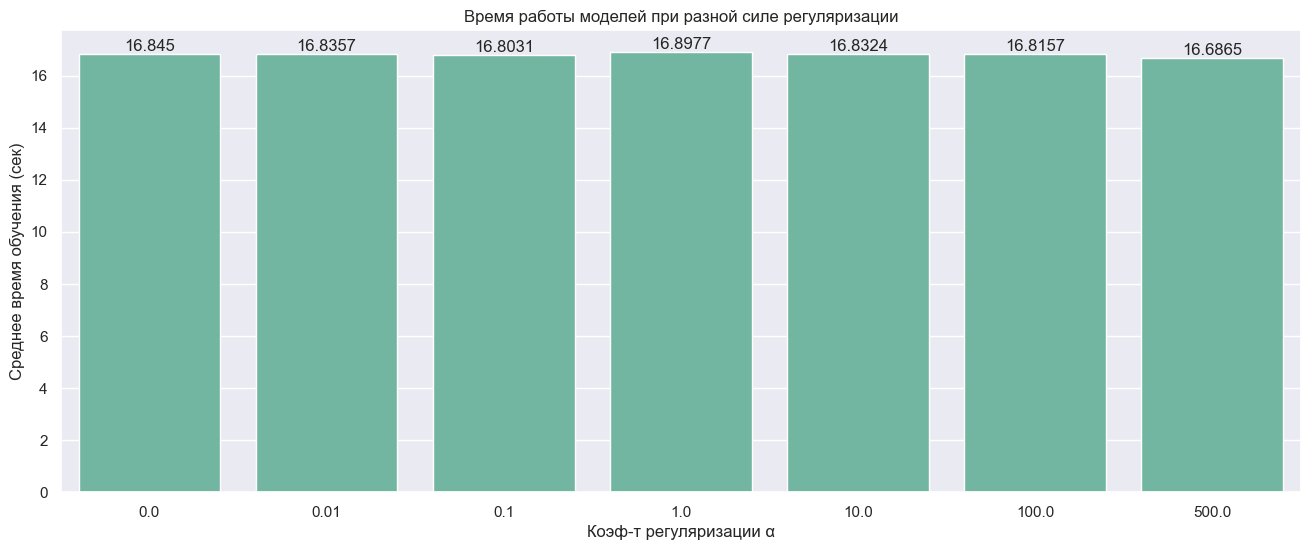

In [30]:
plt.figure(figsize=(16,6))
ax = sns.barplot(x=alphas, y=times, errwidth=0)
ax.bar_label(ax.containers[0])
plt.xlabel('Коэф-т регуляризации α')
plt.ylabel('Среднее время обучения (сек)')
plt.title('Время работы моделей при разной силе регуляризации');

*По полученному графику сложно сделать уверенные выводы о влиянии силы регуляризации на время обучения. Но насколько можно судить, такого влияния нет*

**6.** Возьмите лучшую модель с предыдущего шага. В исходной выборке оставьте только два произвольных признака и обучите на них модель без использования свободного параметра. Визуализируйте предсказания вероятностей класса $1$ для модели.

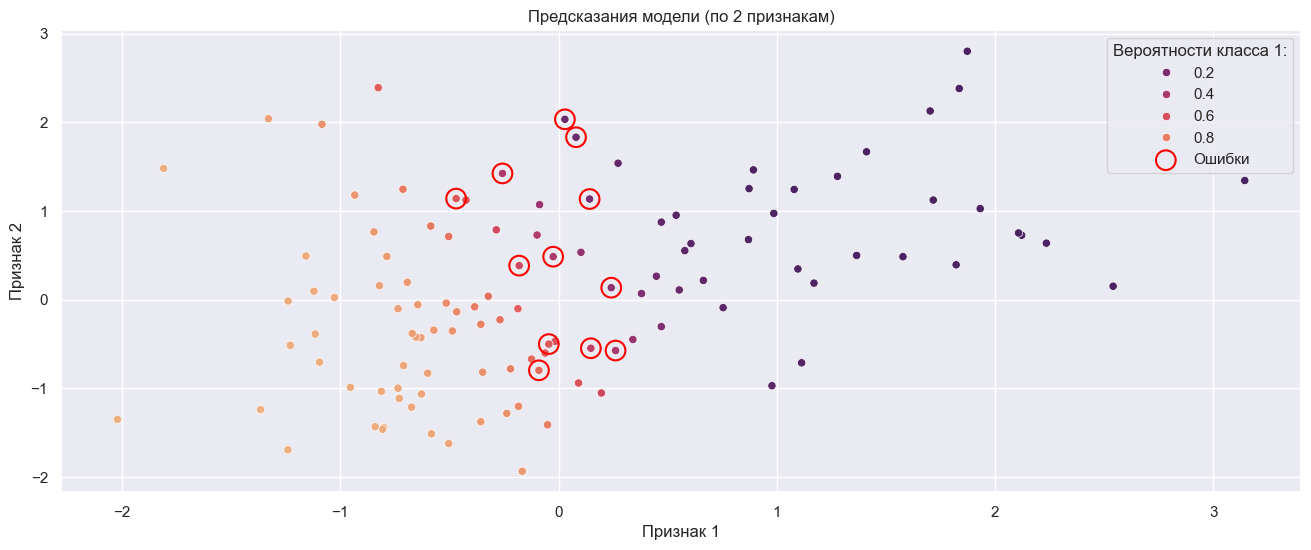

In [31]:
model = LogisticRegression(method='gd', save_history=False, alpha=0.01, fit_intercept=False, max_iter=10000)
model.fit(X_train[:,:2], y_train)
y_pred_proba, y_pred = model.predict_proba(X_test[:,:2])[:,1], model.predict(X_test[:,:2])

plt.figure(figsize=(16,6))
sns.scatterplot(x=X_test[:,0], y=X_test[:,1], hue=y_pred_proba, palette='flare_r')
incorrect_indices = np.where(y_pred != y_test)[0]
plt.scatter(X_test[incorrect_indices, 0], X_test[incorrect_indices, 1], facecolors='none', edgecolor='red', 
    s=200, linewidth=1.5, label='Ошибки')  # мне показалось наглядным дополнительно подсветить ошибки модели
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.legend(title='Вероятности класса 1:')
plt.title('Предсказания модели (по 2 признакам)');

*На примере 2х признаков наглядно видно, как работает логистическая регрессия: она разделила пространсто признаков гиперплоскостью так, что слева - преимущестенно один класс, а справа - другой. Цветовой градиент на графике показывает, что чем дальше объект от границы раздела, тем увереннее модель в его классе. Поэтому все ошибки сосредоточены вблизи границы раздела, где обитают сомнительные кейсы*

**Вывод:**   
*В рамках задачи удалось реализовать логистическую регрессию с тремя методами оптимизации, сравнить эти методы по качеству и скорости, сравнить обучаемость модели с разными критериями остановки, а также исследовать влияние силы регуляризации и learning_rate на работу модели*